<a href="https://colab.research.google.com/github/LPValente/TensorFlow2.0/blob/main/TF2_0_LSTM_Nonlinear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
# Intall TensorFlow
!pip install -q tensorflow-gpu==2.0.0
import tensorflow as tf
print(tf.__version__)

ERROR: Could not find a version that satisfies the requirement tensorflow-gpu==2.0.0 (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.12.0)
ERROR: No matching distribution found for tensorflow-gpu==2.0.0
2.12.0


In [16]:
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
# make the original data
series = np.sin((0.1*np.arange(400))**2)

This is a time series of the form:

<center> $x(t)=sin(ωt^2)$ </center>

<function matplotlib.pyplot.show(close=None, block=None)>

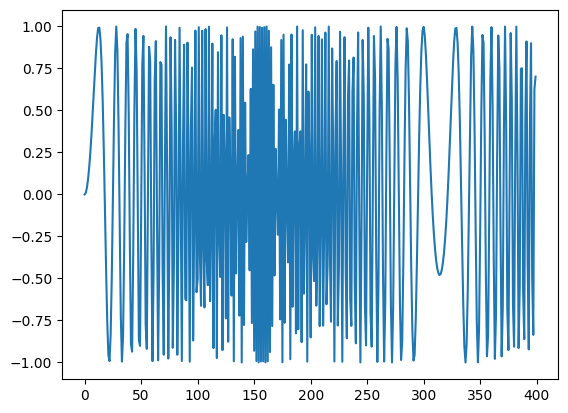

In [18]:
# plot it
plt.plot(series)
plt.show

In [19]:
### build the data set
# let's see if we can use T past values to predict the next value
T = 10
D = 1
X = []
Y = []
for t in range(len(series)-T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T) # make it N x T
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (390, 10) Y.shape (390,)


In [20]:
### try autoregressive linear model
i = Input(shape=(T,))
x = Dense(1)(i)
model = Model(i, x)
model.compile(
    loss='mse',
    optimizer=Adam(lr=0.01),
)

# train the RNN
r = model.fit(
    X[:-N//2], Y[:-N//2],
    epochs=80,
    validation_data=(X[-N//2:], Y[-N//2:]),
)

Epoch 1/80
7/7 [==============================] - 1s 33ms/step - loss: 1.2317 - val_loss: 1.0399
Epoch 2/80
7/7 [==============================] - 0s 21ms/step - loss: 1.2129 - val_loss: 1.0275
Epoch 3/80
7/7 [==============================] - 0s 9ms/step - loss: 1.1951 - val_loss: 1.0201
Epoch 4/80
7/7 [==============================] - 0s 9ms/step - loss: 1.1772 - val_loss: 1.0117
Epoch 5/80
7/7 [==============================] - 0s 7ms/step - loss: 1.1623 - val_loss: 1.0034
Epoch 6/80
7/7 [==============================] - 0s 8ms/step - loss: 1.1472 - val_loss: 0.9936
Epoch 7/80
7/7 [==============================] - 0s 9ms/step - loss: 1.1316 - val_loss: 0.9840
Epoch 8/80
7/7 [==============================] - 0s 8ms/step - loss: 1.1170 - val_loss: 0.9741
Epoch 9/80
7/7 [==============================] - 0s 21ms/step - loss: 1.1008 - val_loss: 0.9644
Epoch 10/80
7/7 [==============================] - 0s 11ms/step - loss: 1.0843 - val_loss: 0.9551
Epoch 11/80
7/7 [==================

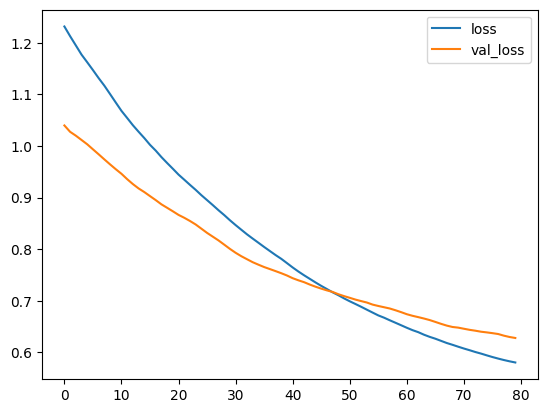

In [21]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

13/13 [==============================] - 0s 2ms/step
(390, 1)


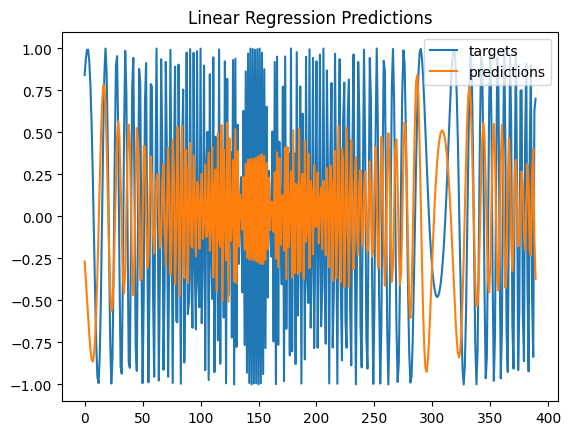

In [22]:
# One-step forecast using true targets
# Note: even the one-step forecast fails badly
outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:,0]

plt.plot(Y, label='targets')
plt.plot(predictions, label='predictions')
plt.title("Linear Regression Predictions")
plt.legend()
plt.show()


1/1 [==============================] - 0s 24ms/step


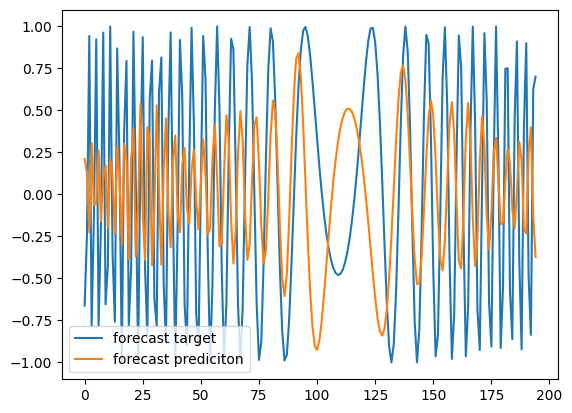

In [23]:
# This is the code we had before - it does the same thing

# One-step forecast using true targets

validation_target = Y[-N//2:]
validation_predictions = []

# index of first validation input
i = -N//2

while len(validation_predictions) < len(validation_target):
  p = model.predict(X[i].reshape(1,-1))[0,0] # 1x1 array -> scalar
  i += 1

  # update the predictions list
  validation_predictions.append(p)

plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediciton')
plt.legend()

1/1 [==============================] - 0s 33ms/step


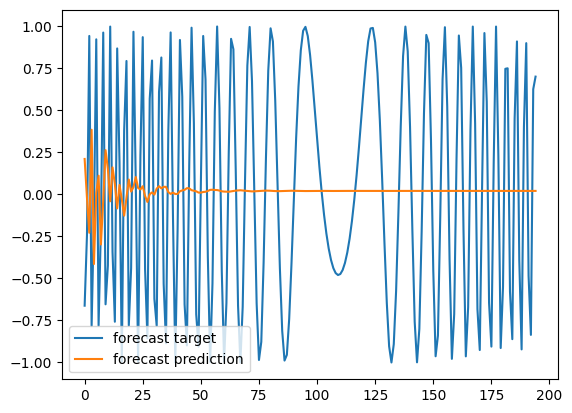

In [24]:
# Multi-step forecast
validation_target = Y[-N//2:]
validation_predictions = []

# last train input
last_x = X[-N//2] # 1-D array of length T

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, -1))[0,0] # 1x1 array -> scalar

  # update the predictions list
  validation_predictions.append(p)

  # make the new input
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

In [33]:
### Now try RNN/LSTM model
X = X.reshape(-1, T, 1) # make it N x T x D

# make the RNN
i = Input(shape=(T,D))
x = LSTM(10)(i)
x = Dense(1)(x)
model = Model(i, x)
model.compile(
    loss='mse',
    optimizer=Adam(learning_rate=0.05)
)

# train the RNN
r = model.fit(
    X[:-N//2], Y[:-N//2],
    batch_size=32,
    epochs=200,
    validation_data=(X[-N//2:], Y[-N//2:])
)

Epoch 1/200
7/7 [==============================] - 3s 89ms/step - loss: 0.5532 - val_loss: 0.5434
Epoch 2/200
7/7 [==============================] - 0s 11ms/step - loss: 0.4921 - val_loss: 0.6232
Epoch 3/200
7/7 [==============================] - 0s 12ms/step - loss: 0.4276 - val_loss: 0.5402
Epoch 4/200
7/7 [==============================] - 0s 12ms/step - loss: 0.3549 - val_loss: 0.4513
Epoch 5/200
7/7 [==============================] - 0s 11ms/step - loss: 0.2866 - val_loss: 0.4494
Epoch 6/200
7/7 [==============================] - 0s 11ms/step - loss: 0.2258 - val_loss: 0.2724
Epoch 7/200
7/7 [==============================] - 0s 11ms/step - loss: 0.1582 - val_loss: 0.2129
Epoch 8/200
7/7 [==============================] - 0s 13ms/step - loss: 0.1691 - val_loss: 0.3759
Epoch 9/200
7/7 [==============================] - 0s 13ms/step - loss: 0.1873 - val_loss: 0.3015
Epoch 10/200
7/7 [==============================] - 0s 12ms/step - loss: 0.1199 - val_loss: 0.1349
Epoch 11/200
7/7 [=

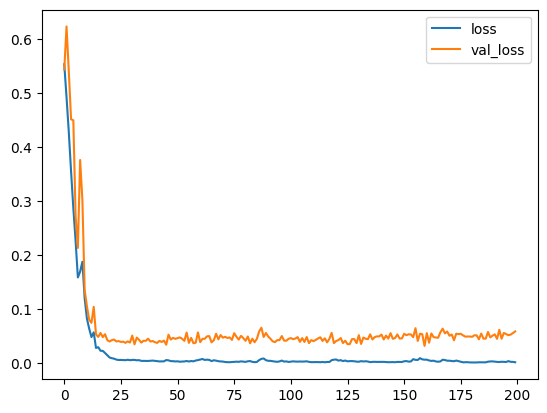

In [34]:
# plot some data
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

13/13 [==============================] - 0s 2ms/step
(390, 1)


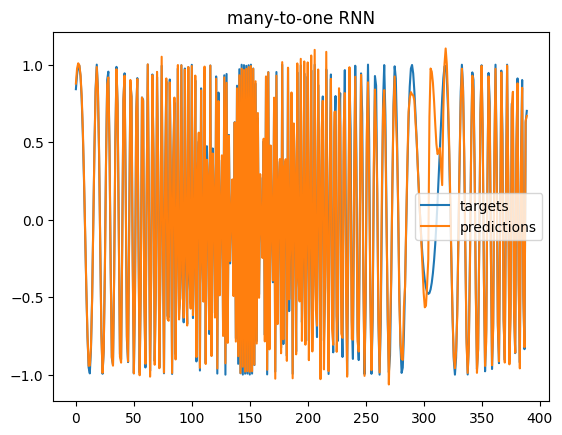

In [35]:
# One-step forecast using true targets
outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:,0]

plt.plot(Y, label='targets')
plt.plot(predictions, label='predictions')
plt.title("many-to-one RNN")
plt.legend()
plt.show()

1/1 [==============================] - 0s 21ms/step


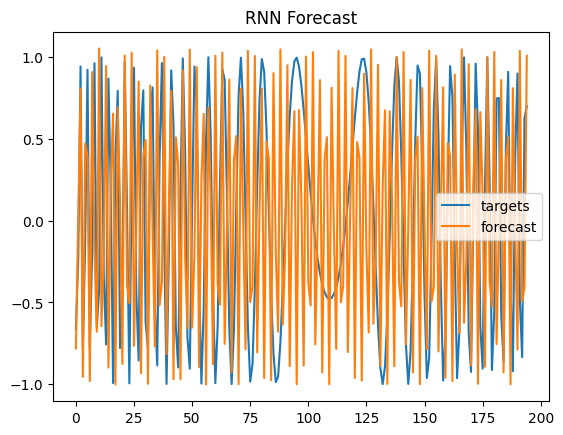

In [36]:
# Multi-step forecast
forecast = []
input_ = X[-N//2]
while len(forecast) < len(Y[-N//2:]):
  # Reshape the input_ to N x T x D
  f = model.predict(input_.reshape(1, T, 1))[0,0]
  forecast.append(f)

  # make a new input with the latest forecast
  input_ = np.roll(input_, -1)
  input_[-1] = f

plt.plot(Y[-N//2:], label='targets')
plt.plot(forecast, label='forecast')
plt.title("RNN Forecast")
plt.legend()
plt.show()